In [2]:
import numpy as np
import pandas as pd

In [3]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


### 0. 주어진 데이터를 불러온 후 상위 10개 행을 출력해 주세요.
- train.csv 데이터 사용

In [4]:
df = pd.read_csv('gdrive/MyDrive/BOAZ/train.csv')

In [5]:
df.iloc[0:10,:]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
5,5,20150403T000000,662500.0,3,2.50,3560,9796,1.0,0,0,3,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
6,6,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
7,7,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
8,8,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208
9,9,20150312T000000,530000.0,5,2.00,1810,4850,1.5,0,0,3,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850


### 1. 각 Column별로 null값이 있는지 확인해주세요.

In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### 2. grade Column에는 어떤 값이 있는지 확인해주세요.

In [7]:
df.grade.unique()

array([ 7,  6,  8,  9, 10, 11, 12,  5,  4,  3, 13,  1])

### 3. zipcode에 대해서 문자열로 바꿔주세요.

In [8]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [9]:
df['zipcode'] = df['zipcode'].astype(str)

In [10]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode           object
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
id               15035 non-null int64
date             15035 non-null object
price            15035 non-null float64
bedrooms         15035 non-null int64
bathrooms        15035 non-null float64
sqft_living      15035 non-null int64
sqft_lot         15035 non-null int64
floors           15035 non-null float64
waterfront       15035 non-null int64
view             15035 non-null int64
condition        15035 non-null int64
grade            15035 non-null int64
sqft_above       15035 non-null int64
sqft_basement    15035 non-null int64
yr_built         15035 non-null int64
yr_renovated     15035 non-null int64
zipcode          15035 non-null object
lat              15035 non-null float64
long             15035 non-null float64
sqft_living15    15035 non-null int64
sqft_lot15       15035 non-null int64
dtypes: float64(5), int64(14), object(2)
memory usage: 2.4+ MB


### 4. loc를 활용하여 date, price, grade만 출력해주세요.

In [11]:
df.loc[:,['date','price','grade']]

,date,price,grade
0,20141013T000000,221900.0,7
1,20150225T000000,180000.0,6
2,20150218T000000,510000.0,8
3,20140627T000000,257500.0,7
4,20150115T000000,291850.0,7
...,...,...,...
15030,20141014T000000,610685.0,9
15031,20150326T000000,1007500.0,9
15032,20140521T000000,360000.0,8
15033,20150223T000000,400000.0,8


### 5. grade가 13인 행들만 보여주세요.

In [12]:
df.query("grade == 13")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3134,3134,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
3867,3867,20141010T000000,1780000.0,4,3.25,4890,13402,2.0,0,0,3,13,4890,0,2004,0,98059,47.5303,-122.131,5790,13539
4266,4266,20141120T000000,2385000.0,4,4.00,6330,13296,2.0,0,2,3,13,4900,1430,2000,0,98033,47.6488,-122.201,2200,9196
4957,4957,20140701T000000,3800000.0,5,5.50,7050,42840,1.0,0,2,4,13,4320,2730,1978,0,98004,47.6229,-122.220,5070,20570
5108,5108,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
5560,5560,20140923T000000,3200000.0,6,5.00,7100,18200,2.5,0,0,3,13,5240,1860,1933,2002,98199,47.6427,-122.408,3130,6477
6469,6469,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
7246,7246,20141212T000000,2983000.0,5,5.50,7400,18898,2.0,0,3,3,13,6290,1110,2001,0,98006,47.5431,-122.112,6110,26442
10152,10152,20140611T000000,2888000.0,5,6.25,8670,64033,2.0,0,4,3,13,6120,2550,1965,2003,98177,47.7295,-122.372,4140,81021


### 6. grade별로 평균 가격을 보여주세요.

In [13]:
df_mean = df.groupby('grade')['price'].agg([('price_mean','mean')])
df_mean

,price_mean
grade,
1,1.420000e+05
3,2.710000e+05
4,2.097413e+05
5,2.510696e+05
6,3.001554e+05
7,4.015281e+05
8,5.423156e+05
9,7.734781e+05
10,1.062482e+06


### 7. 6번에서 만든 데이터를 원본 데이터와 merge해주세요.

In [14]:
df = pd.merge(df, df_mean, left_on='grade', right_on='grade', how='inner')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_mean
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,4.015281e+05
1,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,4.015281e+05
2,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,4.015281e+05
3,6,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000,4.015281e+05
4,7,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697,4.015281e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15030,5560,20140923T000000,3200000.0,6,5.00,7100,18200,2.5,0,0,3,13,5240,1860,1933,2002,98199,47.6427,-122.408,3130,6477,4.132333e+06
15031,6469,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730,4.132333e+06
15032,7246,20141212T000000,2983000.0,5,5.50,7400,18898,2.0,0,3,3,13,6290,1110,2001,0,98006,47.5431,-122.112,6110,26442,4.132333e+06
15033,10152,20140611T000000,2888000.0,5,6.25,8670,64033,2.0,0,4,3,13,6120,2550,1965,2003,98177,47.7295,-122.372,4140,81021,4.132333e+06


### 8. Date Column을 이용해 년, 월, 일에 해당하는 3개의 새로운 Column을 만들어주세요.

In [15]:
df['year'] = df['date'].apply(lambda x: x[:4])
df['month'] = df['date'].apply(lambda x: x[4:6])
df['day'] = df['date'].apply(lambda x: x[6:8])

df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_mean,year,month,day
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,4.015281e+05,2014,10,13
1,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,4.015281e+05,2014,06,27
2,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,4.015281e+05,2015,01,15
3,6,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000,4.015281e+05,2014,05,27
4,7,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697,4.015281e+05,2014,05,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15030,5560,20140923T000000,3200000.0,6,5.00,7100,18200,2.5,0,0,3,13,5240,1860,1933,2002,98199,47.6427,-122.408,3130,6477,4.132333e+06,2014,09,23
15031,6469,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730,4.132333e+06,2014,09,19
15032,7246,20141212T000000,2983000.0,5,5.50,7400,18898,2.0,0,3,3,13,6290,1110,2001,0,98006,47.5431,-122.112,6110,26442,4.132333e+06,2014,12,12
15033,10152,20140611T000000,2888000.0,5,6.25,8670,64033,2.0,0,4,3,13,6120,2550,1965,2003,98177,47.7295,-122.372,4140,81021,4.132333e+06,2014,06,11


### 9. 이후 Price를 예측하는 모델을 제작하기 위해 추가적인 변수를 만드려고 합니다. Price의 데이터 분포를 확인하고 1개 이상의 EDA를 통해 의견을 제시해주세요.

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)

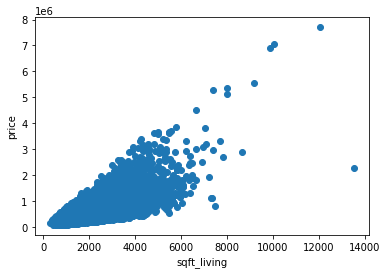

In [18]:
plt.scatter(x = df['sqft_living'], y = df['price'])
plt.ylabel('price')
plt.xlabel('sqft_living')
plt.show()

# 학습대상인 train data에 price와 sqft_living 변수간의 outlier를 제거하면 좋을 것 같습니다.
# 나아가 price와 다른 변수도 적용하여 outlier를 적당히 제거해주면 좋을 것 같습니다.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


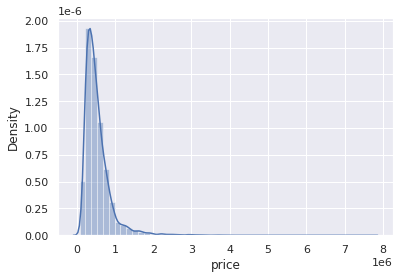

In [19]:
import seaborn as sns
sns.set()
sns.distplot(df['price'])

# price 데이터가 한 쪽으로 쏠린 것으로 보입니다. 이 경우 학습에 영향을 줄 수 있기 때문에 
# 로그 변환을 통해 정규성을 띄게 바꾸어주는 것도 좋을 것 같습니다.

In [20]:
corrmat = df.corr()
corr_columns = corrmat.index[abs(corrmat["price"])>=0.4] # 상관계수 0.4 이상만 포함
corr_columns

# target값인 price와 각 feature들 간 상관계수가 0.4 이상인 column을 확인한 이후 히트맵을 통해 확인합니다.
# 이를 통해 각 feature들이 price와 얼마나 강한 관련이 있는지 알아낼 수 있습니다.
# price가 아닌 각 변수들 간의 상관관계가 높으면, 다중공산성 문제가 있는지 확인합니다.

Index(['price', 'bathrooms', 'sqft_living', 'view', 'grade', 'sqft_above',
       'sqft_living15', 'price_mean'],
      dtype='object')

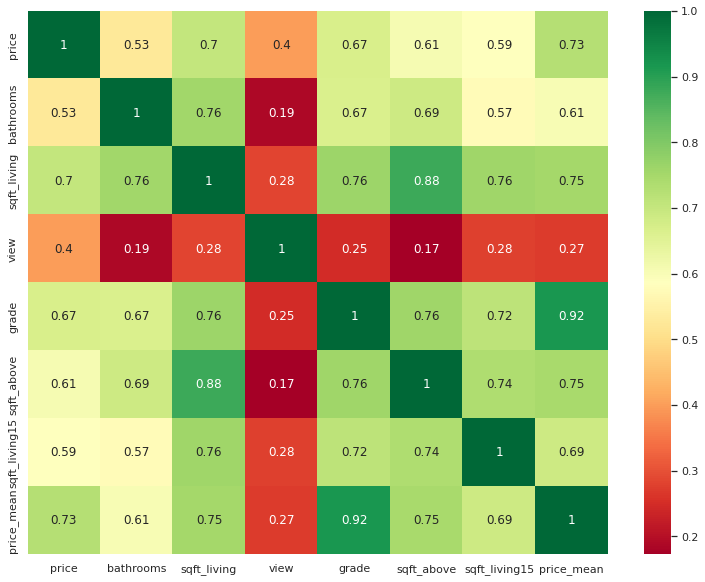

In [21]:
plt.figure(figsize=(13,10))
heatmap = sns.heatmap(df[corr_columns].corr(),annot=True,cmap="RdYlGn")

# price와의 상관관계는 sqft_living이 0.7로 가장 높게 나타납니다.


# grade와 price_mean의 상관관계가 0.92로 높게 나타납니다.
# 이에 두 변수 중 하나를 지우는 것이 좋을 것 같습니다.
# sqft_living과 sqft_above의 상관관계가 0.88로 높게 나타납니다.
# 마찬가지로 두 변수 중 하나를 지우는 것이 좋을 것 같습니다.